
<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue"></span>Data Cleaning</h1>
<hr>




### Import libraries and load the dataset.



In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('project_files/real_estate_data.csv')

<br id="drop">
# Drop unwanted observations



<br>


In [3]:
# Drop duplicates
df.drop_duplicates()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,146,10,23,27,86,9,60,52,28.0,15.0,86.0,168.0,58.0,8.0,3.0,2004
6,240000,1,1,642,1944,0,Single-Family,Brick,NaN,NaN,159,13,36,17,92,12,66,50,28.0,36.0,88.0,176.0,61.0,7.0,3.0,2011
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,266.0,92.0,9.0,3.0,2005
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,51,8,6,2,40,18,32,41,36.0,49.0,77.0,188.0,65.0,6.0,3.0,2013
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,119,10,26,25,183,13,70,36,57.0,13.0,83.0,147.0,51.0,6.0,3.0,2007



<div style="text-align:center; margin: 40px 0 40px 0;">

</div>

<br id="structural">
# Fix structural errors

<br>


In [4]:
# Display unique values of 'basement'
df.basement.unique()

array([nan,  1.])

Fill missing <code style="color:steelblue">'basement'</code> values with the value <code style="color:crimson">0</code> to turn <code style="color:steelblue">'basement'</code> into a true indicator variable.

In [5]:
# Missing basement values should be 0
df.basement = df.basement.fillna(0)

# Again I forgot to mutate the original df. After changing a column in df you need to reassign 
# it to the original columns

Confirm that we have a true indicator variable:

In [6]:
# Display unique values of 'basement'
df.basement.unique()

array([0., 1.])

Next, to check for typos or inconsistent capitalization, display all the class distributions for the <code style="color:steelblue">'roof'</code> feature.

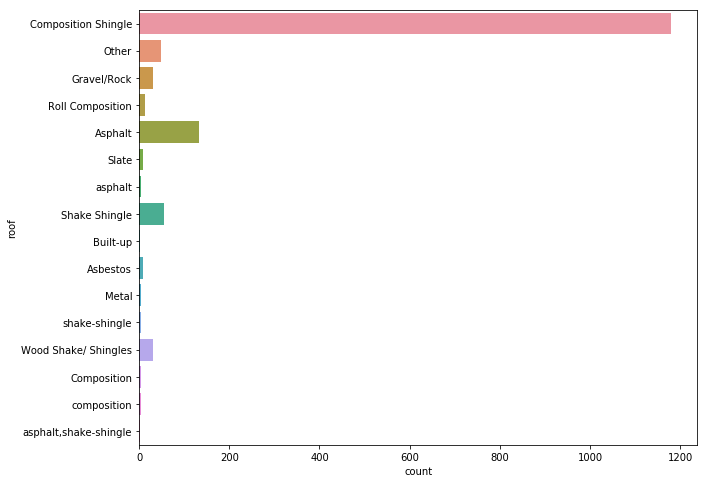

In [7]:
# Class distributions for 'roof'
plt.figure(figsize = (10,8))
sns.countplot(y = 'roof', data = df)

In [8]:
# 'composition' should be 'Composition'
df.roof.replace('composition',"Composition", inplace = True)

# 'asphalt' should be 'Asphalt'
df.roof.replace('asphalt',"Asphalt",inplace = True)

# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df.roof.replace(['asphalt,shake-shingle', 'shake-shingle'], "Shake Shingle", inplace = True)

 we'll check for mislabeled classes

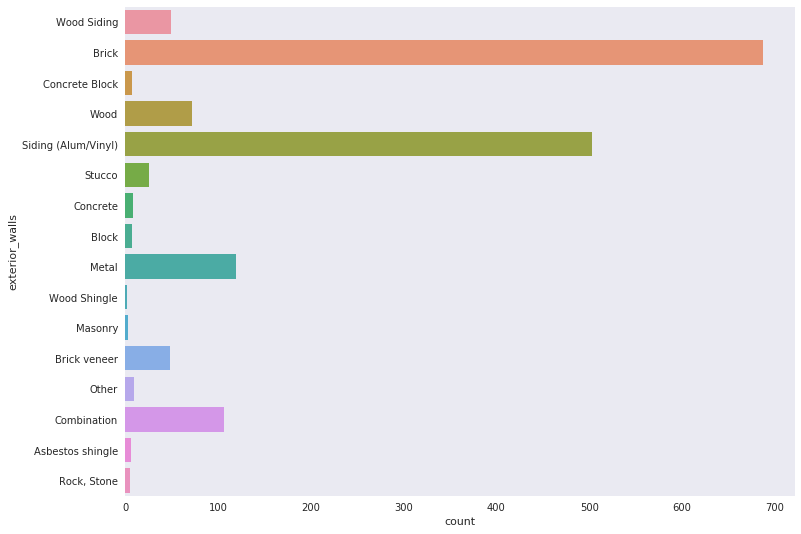

In [9]:
# Class distributions for 'exterior_walls'
sns.set(style = "dark")
plt.figure(figsize = (12,9))
sns.countplot(y = "exterior_walls", data = df)
plt.show()

In [10]:
# 'Rock, Stone' should be 'Masonry'
df.exterior_walls.replace("Rock, Stone", "Masonry", inplace = True)

In [11]:
# 'Concrete' and 'Block' should be 'Concrete Block'
df.exterior_walls.replace(["Concrete", "Block"], "Concrete Block", inplace = True)

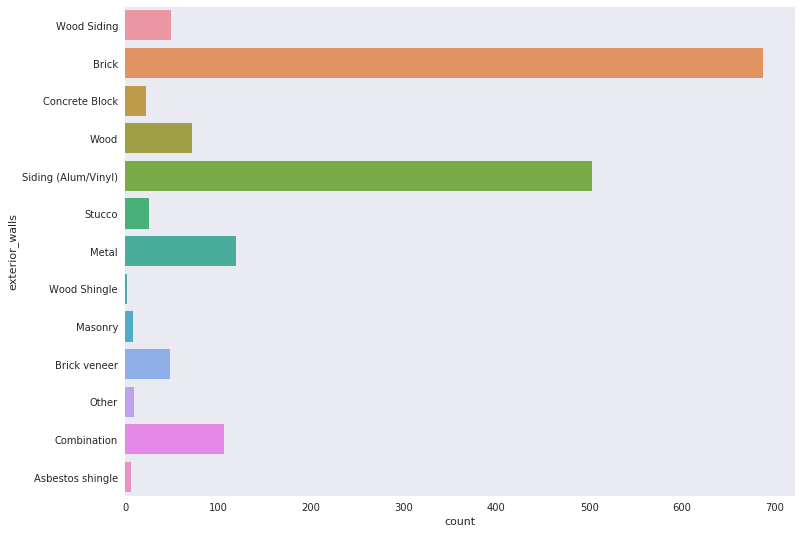

In [12]:
# Class distributions for 'exterior_walls'
sns.set(style = "dark")
plt.figure(figsize = (12,9))
sns.countplot(y = "exterior_walls", data = df)
plt.show()

<br id="outliers">
# Remove unwanted outliers



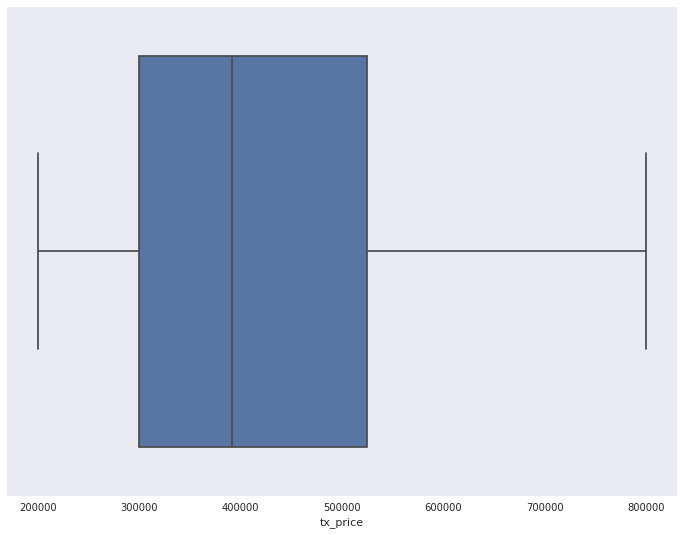

In [13]:
# Box plot of 'tx_price' using the Seaborn library
sns.set(style = "dark")
plt.figure(figsize = (12,9))
sns.boxplot(x = "tx_price", data = df)
plt.show()



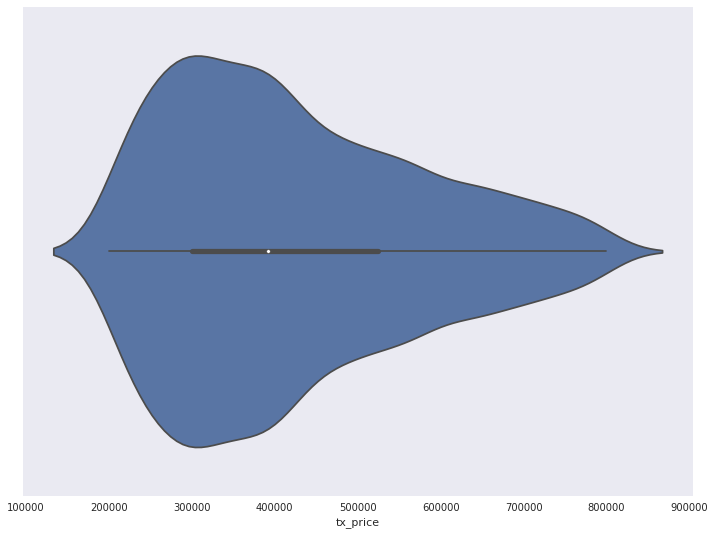

In [14]:
# Violin plot of 'tx_price' using the Seaborn library
sns.set(style = "dark")
plt.figure(figsize = (12,9))
sns.violinplot(x = "tx_price", data = df)
plt.show()


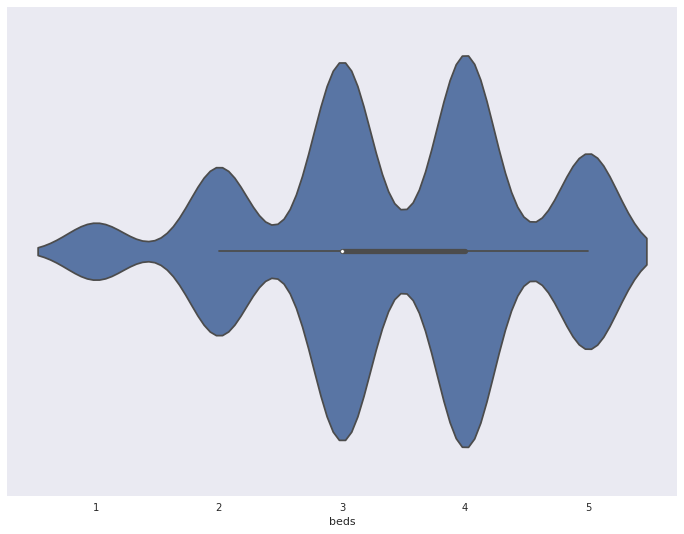

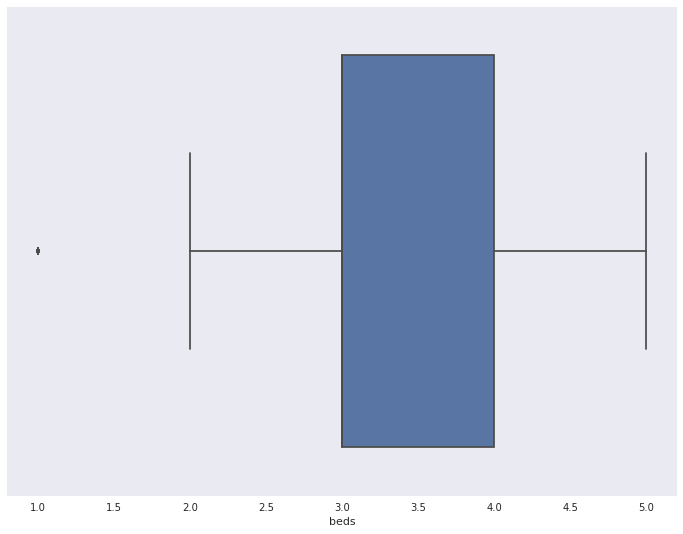

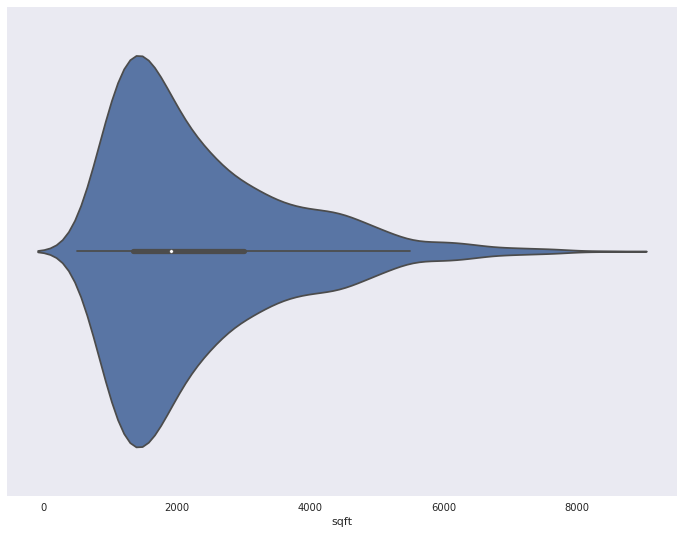

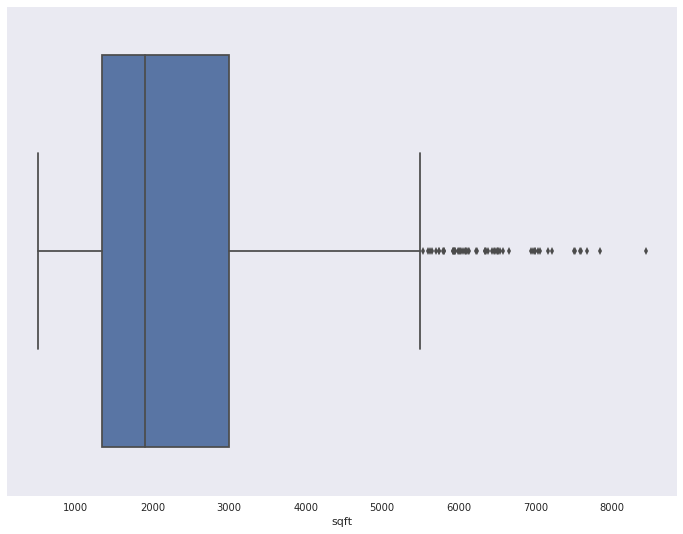

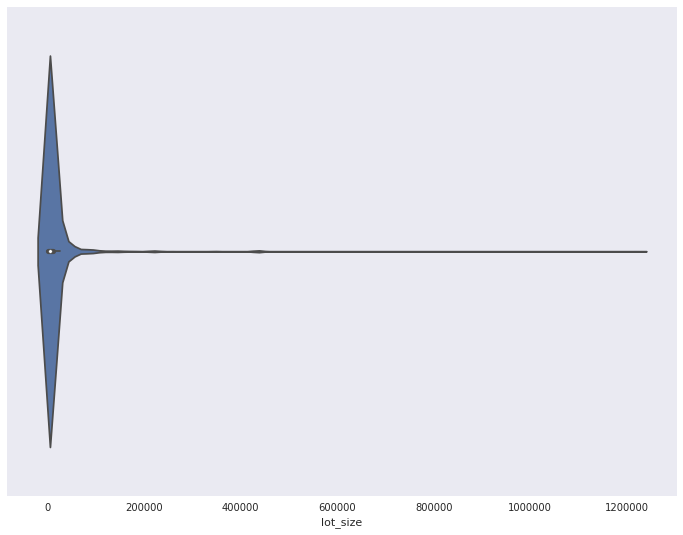

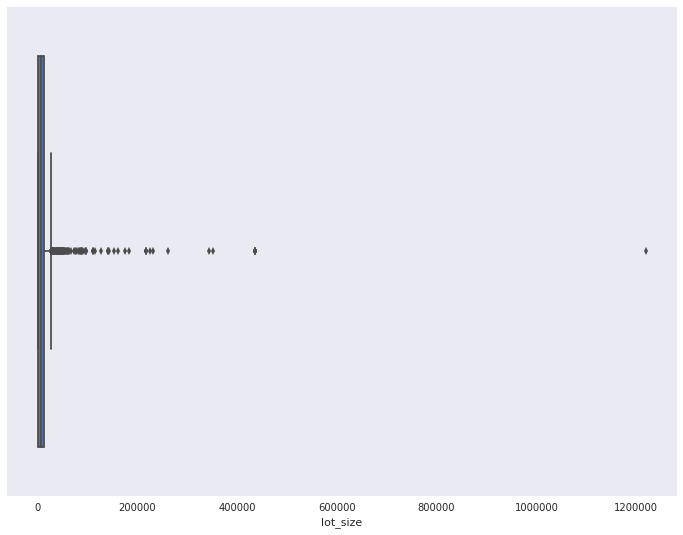

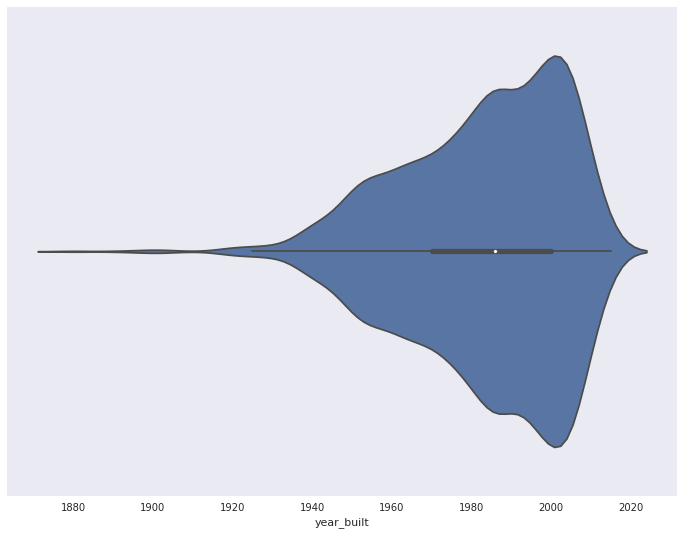

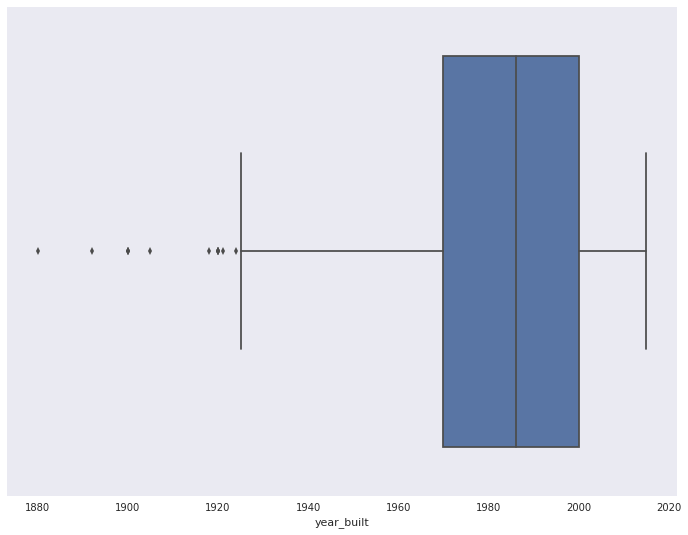

In [15]:
# Violin plot of beds

sns.set(style = "dark")
plt.figure(figsize = (12,9))
sns.violinplot(x = "beds", data = df)
plt.show()

# Box Plot of beds

sns.set(style = "dark")
plt.figure(figsize = (12,9))
sns.boxplot(x = "beds", data = df)
plt.show()

# Violin plot of sqft

sns.set(style = "dark")
plt.figure(figsize = (12,9))
sns.violinplot(x = "sqft", data = df)
plt.show()

# Box Plot of sqft

sns.set(style = "dark")
plt.figure(figsize = (12,9))
sns.boxplot(x = "sqft", data = df)
plt.show()

# Violin plot of lot_size

sns.set(style = "dark")
plt.figure(figsize = (12,9))
sns.violinplot(x = "lot_size", data = df)
plt.show()

# Box Plot of lot_size

sns.set(style = "dark")
plt.figure(figsize = (12,9))
sns.boxplot(x = "lot_size", data = df)
plt.show()

# Violin plot of year_built

sns.set(style = "dark")
plt.figure(figsize = (12,9))
sns.violinplot(x = "year_built", data = df)
plt.show()

# Box Plot of year_built

sns.set(style = "dark")
plt.figure(figsize = (12,9))
sns.boxplot(x = "year_built", data = df)
plt.show()







Among those three features, it looks like <code style="color:steelblue">lot_size</code> has a potential outlier because of its long and skinny tail.
* Let's look at the largest 5 lot sizes just to confirm.



In [16]:
# Sort df.beds and display the top 5 samples
print(df.beds.sort_values(ascending = True).head(), '\n')

# Sort df.sqft and display the top 5 samples
print(df.sqft.sort_values(ascending = False).head(), '\n')

# Sort df.lot_size and display the top 5 samples
print(df.lot_size.sort_values(ascending = False).head())

# Sort df.lot_size and display the top 5 samples
print(df.year_built.sort_values(ascending = True).head())

0     1
65    1
64    1
63    1
62    1
Name: beds, dtype: int64 

1877    8450
1876    7842
1563    7677
1875    7594
1874    7578
Name: sqft, dtype: int64 

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64
159     1880
1101    1892
697     1900
1113    1900
1488    1900
Name: year_built, dtype: int64


The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft. 

Because it's unlikely the REIT will ever invest in properties with lots that large, and because it's the only one in the dataset, we remove it so it doesn't interfere with our ability to model normal size properties.



In [17]:
print(len(df))


# Remove lot_size outliers
df = df[df.lot_size < 500000]

# print length of df
len(df)

1883


1882

<br id="missing-categorical">
# Label missing categorical data


In [18]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include = "object").isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

In [19]:
# Fill missing categorical values
# interesting so it does seem that if you want to select columns by their type that is 
# select either all numeric columns or all categorical columns then we must use select_dtypes(include = ["object"])
for column in df.select_dtypes(include = ["object"]):
    df[column] = df[column].fillna("Missing")
    
   
    


In [20]:
# Display number of missing values by feature (categorical)

df.select_dtypes(include = ["object"]).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">


<br id="missing-numeric">
# Flag and fill missing numeric data

Finally, let's flag and fill missing numeric data.

<br>
First, let's find and count missing values in numerical feature.

In [21]:
import numpy as np

# Display number of missing values by feature (numeric)
for col in df.select_dtypes(exclude = ["object"]):
    print(col)
    
df.select_dtypes(exclude = ["object"]).isnull().sum()    

tx_price
beds
baths
sqft
year_built
lot_size
basement
restaurants
groceries
nightlife
cafes
shopping
arts_entertainment
beauty_spas
active_life
median_age
married
college_grad
property_tax
insurance
median_school
num_schools
tx_year


tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

<br>
### Finally we save the cleaned dataframe.



In [22]:
# Save cleaned dataframe to new file
df.to_csv('cleaned_df.csv', index=None)